In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_cleaned = pd.read_csv("new_merged_df.csv")
df_cleaned.head(5)

,Team,Season Success,Games Played,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
0,Brooklyn Nets,Eliminated in First Round,82.0,19755.0,42.2,89.0,0.475,11.5,31.9,0.361,...,10.4,34.3,44.7,25.4,7.1,5.5,14.1,20.5,113.6,1
1,Atlanta Hawks,Eliminated in First Round,82.0,19705.0,42.4,90.3,0.470,13.2,35.2,0.374,...,10.3,34.7,45.0,25.2,7.3,4.3,12.1,19.1,116.5,1
2,Chicago Bulls,Eliminated in First Round,82.0,19730.0,42.3,88.2,0.480,10.8,29.3,0.369,...,8.8,34.2,42.9,24.2,7.2,4.2,13.0,19.1,113.2,1
3,Toronto Raptors,Eliminated in First Round,82.0,19855.0,41.9,94.3,0.445,12.3,35.3,0.349,...,13.8,33.0,46.8,22.8,9.3,4.7,12.9,20.2,112.9,1
4,Utah Jazz,Eliminated in First Round,82.0,19730.0,41.7,88.5,0.471,14.9,41.4,0.360,...,11.1,36.5,47.6,23.0,7.4,5.0,14.4,19.4,116.7,1


In [2]:
print(df_cleaned.columns)


Index(['Team', 'Season Success', 'Games Played', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Playoffs'],
      dtype='object')


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team            30 non-null     object 
 1   Season Success  30 non-null     object 
 2   Games Played    30 non-null     float64
 3   MP              30 non-null     float64
 4   FG              30 non-null     float64
 5   FGA             30 non-null     float64
 6   FG%             30 non-null     float64
 7   3P              30 non-null     float64
 8   3PA             30 non-null     float64
 9   3P%             30 non-null     float64
 10  2P              30 non-null     float64
 11  2PA             30 non-null     float64
 12  2P%             30 non-null     float64
 13  FT              30 non-null     float64
 14  FTA             30 non-null     float64
 15  FT%             30 non-null     float64
 16  ORB             30 non-null     float64
 17  DRB             30 non-null     float

In [13]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns from df_cleaned
numeric_columns = df_cleaned.drop(['Team', 'Season Success', 'Playoffs'], axis=1)

# Fit the scaler to the numeric columns
scaler = StandardScaler()
scaler.fit(numeric_columns)

# Transform the numeric columns
scaled_features = scaler.transform(numeric_columns)


In [16]:
# Drop non-numeric columns from df_cleaned
non_numeric_columns = ['Team', 'Season Success', 'Playoffs']
numeric_columns = df_cleaned.drop(non_numeric_columns, axis=1)

# Fit the scaler to the numeric columns
scaler = StandardScaler()
scaler.fit(numeric_columns)

# Transform the numeric columns
scaled_features = scaler.transform(numeric_columns)

# Create a DataFrame with the scaled features
df_feat = pd.DataFrame(scaled_features, columns=numeric_columns.columns)
df_feat.head()


,Games Played,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,-0.599653,0.775475,-0.095360,0.958908,-0.916874,-1.229201,0.543513,1.121613,0.916035,...,1.119278,-0.058121,-0.190189,-0.189780,0.279123,-0.829463,1.134468,0.202567,0.58404,0.521844
1,0.0,-1.417362,0.919081,0.619838,0.610636,0.508753,-0.134858,1.494051,0.347494,0.410085,...,1.380443,-0.137378,0.126793,-0.006122,0.155980,-0.560448,-0.713534,-2.048179,-0.73476,1.452181
2,0.0,-1.008508,0.847278,-0.535482,1.307180,-1.503897,-2.091411,1.128460,1.586085,1.421984,...,1.417753,-1.326224,-0.269434,-1.291726,-0.459731,-0.694955,-0.867534,-1.035343,-0.73476,0.393522
3,0.0,1.035765,0.560065,2.820447,-1.130722,-0.245991,-0.101697,-0.333907,0.553926,1.421984,...,-0.596948,2.636597,-1.220379,1.095825,-1.321727,2.129702,-0.097533,-1.147880,0.30144,0.297280
4,0.0,-1.008508,0.416459,-0.370436,0.680291,1.934380,1.921180,0.470395,-0.942706,-1.720228,...,-0.298474,0.496674,1.553209,1.585579,-1.198585,-0.425940,0.364467,0.540179,-0.45216,1.516343


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_cleaned['Playoffs'],
                                                    test_size=0.30)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,pred))

[[3 1]
 [1 4]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.80      0.80      0.80         5

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



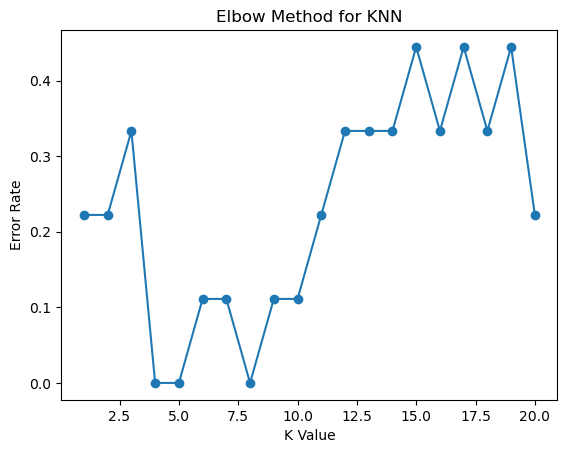

In [28]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Create a list to store the error rates for different K values
error_rates = []

# Define the range of K values to try
k_values = range(1, 21)

# Iterate over different K values
for k in k_values:
    # Create a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the KNN model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    pred = knn.predict(X_test)
    
    # Calculate the error rate (misclassification rate)
    error_rate = sum(pred != y_test) / len(y_test)
    
    # Store the error rate in the list
    error_rates.append(error_rate)

# Plotting the error rates
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for KNN')
plt.show()


In [31]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['K Value', 'Error Rate'])

# Define the range of K values to try
k_values = range(1, 21)

# Iterate over different K values
for k in k_values:
    # Create a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the KNN model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    pred = knn.predict(X_test)
    
    # Calculate the error rate (misclassification rate)
    error_rate = sum(pred != y_test) / len(y_test)
    
    # Append the results to the DataFrame
    results = results.append({'K Value': k, 'Error Rate': error_rate}, ignore_index=True)

# Print the results
print(results)


C:\Users\gabri\AppData\Local\Temp\ipykernel_18088\3163014477.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'K Value': k, 'Error Rate': error_rate}, ignore_index=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_18088\3163014477.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'K Value': k, 'Error Rate': error_rate}, ignore_index=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_18088\3163014477.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'K Value': k, 'Error Rate': error_rate}, ignore_index=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_18088\3163014477.py:26: FutureWarning: The frame.append method is deprecated and will be 

    K Value  Error Rate
0       1.0    0.222222
1       2.0    0.222222
2       3.0    0.333333
3       4.0    0.000000
4       5.0    0.000000
5       6.0    0.111111
6       7.0    0.111111
7       8.0    0.000000
8       9.0    0.111111
9      10.0    0.111111
10     11.0    0.222222
11     12.0    0.333333
12     13.0    0.333333
13     14.0    0.333333
14     15.0    0.444444
15     16.0    0.333333
16     17.0    0.444444
17     18.0    0.333333
18     19.0    0.444444
19     20.0    0.222222


C:\Users\gabri\AppData\Local\Temp\ipykernel_18088\3163014477.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'K Value': k, 'Error Rate': error_rate}, ignore_index=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_18088\3163014477.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'K Value': k, 'Error Rate': error_rate}, ignore_index=True)


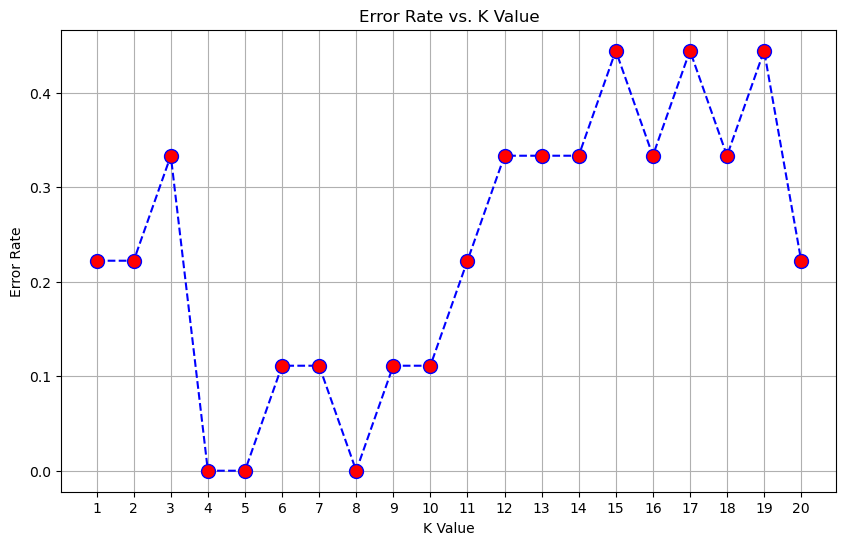

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()
